# m1p0sol
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [9]:
import xarray as xr

from geoplots import mapplot, yticks2lat

%matplotlib notebook

## precip

In [2]:
ncfile_ctl = 'data/precip.CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc'
ncfile_m1p = 'data/precip.m1p0sol_CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc'
pr_scale = 24*3600
new_dims = dict(grid_xt='lon', grid_yt='lat')


In [3]:
with xr.set_options(enable_cftimeindex=True):
    ctl = xr.open_dataarray(ncfile_ctl).rename(new_dims)
    m1p = xr.open_dataset(ncfile_m1p).precip.rename(new_dims)

In [4]:
ctl

<xarray.DataArray 'precip' (time: 2400, lat: 360, lon: 576)>
[497664000 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [5]:
m1p

<xarray.DataArray 'precip' (time: 2400, lat: 360, lon: 576)>
[497664000 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

<IPython.core.display.Javascript object>


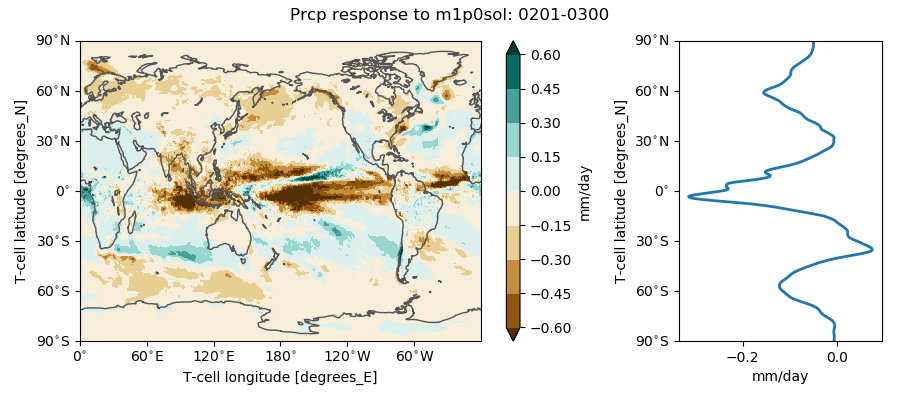

In [20]:
tslice = slice('0201', '0300')
da = m1p.sel(time=tslice).mean('time') - ctl.sel(time=tslice).mean('time')

fig = plt.figure(figsize=(9,4))

ax1 = plt.subplot2grid((1,3),(0,0), colspan=2)
da.pipe(lambda x: x*pr_scale).rename('mm/day').plot(ax=ax1,
                                                    cmap='BrBG', 
                                                    levels=10, 
                                                    robust=True,
                                                   )
plt.sca(ax1) 
mapplot()

ax2 = plt.subplot2grid((1,3),(0,2), colspan=3, sharey=ax1)
da.pipe(lambda x: x.mean('lon')*pr_scale).rolling(lat=9, center=True, min_periods=1).mean().rename('mm/day').plot(ax=ax2, y='lat')
# plt.sca(ax)
# yticks2lat(np.arange(-90,91,30))
ax2.set_ylim(-90,90)

plt.suptitle(f'Prcp response to m1p0sol: {tslice.start}-{tslice.stop}')
plt.tight_layout(rect=[0,0,1,0.95])

In [7]:
dpct = da.geo.fldmean()/ctl.sel(time=tslice).mean('time').geo.fldmean() *100

print(f'Global mean prcp change {dpct.item(): .2f} %')

Global mean prcp change -2.75 %


<IPython.core.display.Javascript object>


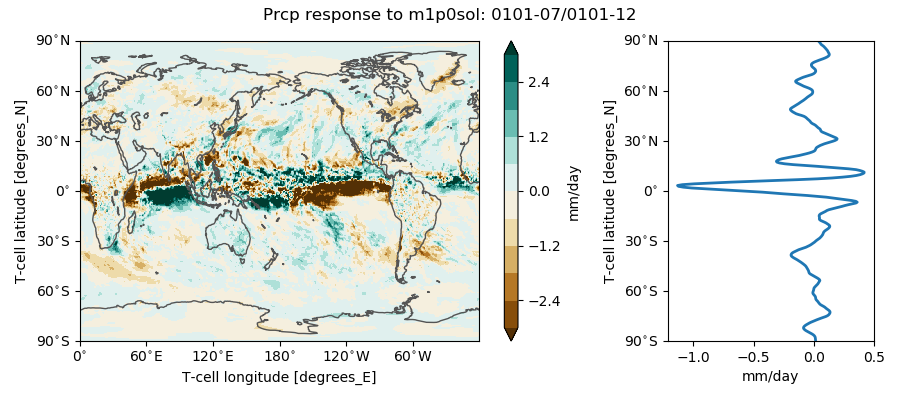

In [43]:
tslice = slice('0101-07', '0101-12')
da = m1p.sel(time=tslice).mean('time') - ctl.sel(time=tslice).mean('time')

fig = plt.figure(figsize=(9,4))

ax1 = plt.subplot2grid((1,3),(0,0), colspan=2)
da.pipe(lambda x: x*pr_scale).rename('mm/day').plot(ax=ax1,
                                                    cmap='BrBG', 
                                                    levels=10, 
                                                    robust=True,
                                                   )
plt.sca(ax1) 
mapplot()

ax2 = plt.subplot2grid((1,3),(0,2), colspan=3, sharey=ax1)
da.pipe(lambda x: x.mean('lon')*pr_scale).rolling(lat=9, center=True, min_periods=1).mean().rename('mm/day').plot(ax=ax2, y='lat')
# plt.sca(ax)
# yticks2lat(np.arange(-90,91,30))
ax2.set_ylim(-90,90)

plt.suptitle(f'Prcp response to m1p0sol: {tslice.start}/{tslice.stop}')
plt.tight_layout(rect=[0,0,1,0.95])

## t_surf

In [3]:
dataname = 't_surf'
ncfile_ctl = f'data/{dataname}.CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc'
ncfile_m1p = f'data/{dataname}.m1p0sol_CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc'
new_dims = dict(grid_xt='lon', grid_yt='lat')


In [4]:
with xr.set_options(enable_cftimeindex=True):
    ctl = xr.open_dataarray(ncfile_ctl).rename(new_dims)
    m1p = xr.open_dataset(ncfile_m1p)[dataname].rename(new_dims)

In [5]:
tslice = slice('0201', '0300')
da = m1p.sel(time=tslice).mean('time') - ctl.sel(time=tslice).mean('time')

In [6]:
print(f'Global mean {dataname} change {da.geo.fldmean().item(): .2f}')

Global mean t_surf change -0.96


<IPython.core.display.Javascript object>


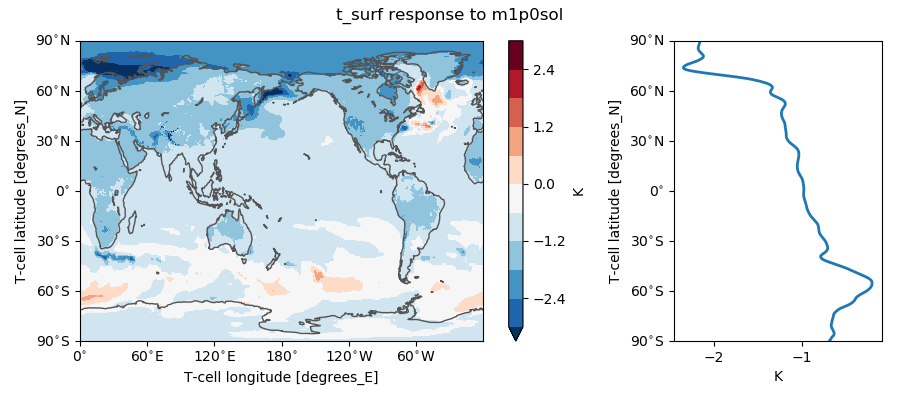

In [10]:
fig = plt.figure(figsize=(9,4))
units = 'K'

ax1 = plt.subplot2grid((1,3),(0,0), colspan=2)
da.rename(units).plot(ax=ax1,
                    levels=10, 
                    robust=True,
                   )
plt.sca(ax1) 
mapplot()

ax2 = plt.subplot2grid((1,3),(0,2), colspan=3, sharey=ax1)
da.mean('lon').rolling(lat=9, center=True, min_periods=1).mean().rename(units).plot(ax=ax2, y='lat')
# plt.sca(ax)
# yticks2lat(np.arange(-90,91,30))
ax2.set_ylim(-90,90)

plt.suptitle(f'{dataname} response to m1p0sol')
plt.tight_layout(rect=[0,0,1,0.95])

<IPython.core.display.Javascript object>


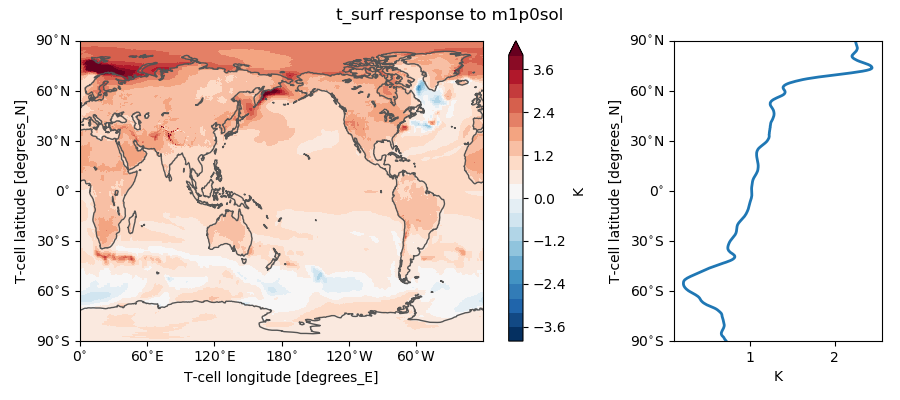

In [12]:
# plot: normalized by global mean t_surf
fig = plt.figure(figsize=(9,4))
units = 'K'
levels = np.arange(-4,4.1, .4)

ax1 = plt.subplot2grid((1,3),(0,0), colspan=2)
da.pipe(lambda x: x/x.geo.fldmean()).rename(units).plot(ax=ax1,
                    levels=levels, 
                    robust=True,
                   )
plt.sca(ax1) 
mapplot()

ax2 = plt.subplot2grid((1,3),(0,2), colspan=3, sharey=ax1)
da.pipe(lambda x: x/x.geo.fldmean()).mean('lon').rolling(lat=9, center=True, min_periods=1).mean().rename(units).plot(ax=ax2, y='lat')
# plt.sca(ax)
# yticks2lat(np.arange(-90,91,30))
ax2.set_ylim(-90,90)

plt.suptitle(f'{dataname} response to m1p0sol')
plt.tight_layout(rect=[0,0,1,0.95])

In [77]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>